In [1]:
"""
Q-Learning example using OpenAI gym MountainCar enviornment
Author: Moustafa Alzantot (malzantot@ucla.edu)
"""
import numpy as np

import gym
from gym import wrappers

n_states = 40
iter_max = 10000

initial_lr = 1.0 # Learning rate
min_lr = 0.003
gamma = 1.0
t_max = 10000
eps = 0.02

def run_episode(env, policy=None, render=False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    for _ in range(t_max):
        if render:
            env.render()
        if policy is None:
            action = env.action_space.sample()
        else:
            a,b = obs_to_state(env, obs)
            action = policy[a][b]
        obs, reward, done, _ = env.step(action)
        total_reward += gamma ** step_idx * reward
        step_idx += 1
        if done:
            break
    return total_reward

def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


In [2]:
score_data = []
matrix = []

env_name = 'MountainCar-v0'
env = gym.make(env_name)
env.seed(0)
np.random.seed(0)
print ('----- using Q Learning -----')
q_table = np.zeros((n_states, n_states, 3))
for i in range(iter_max):
    obs = env.reset()
    total_reward = 0
    ## eta: learning rate is decreased at each step
    eta = max(min_lr, initial_lr * (0.85 ** (i//100)))
    for j in range(t_max):
        a, b = obs_to_state(env, obs)
        if np.random.uniform(0, 1) < eps:
            action = np.random.choice(env.action_space.n)
        else:
            logits = q_table[a][b]
            logits_exp = np.exp(logits)
            probs = logits_exp / np.sum(logits_exp)
            action = np.random.choice(env.action_space.n, p=probs)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        # update q table
        a_, b_ = obs_to_state(env, obs)
        q_table[a][b][action] = q_table[a][b][action] + eta * (reward + gamma *  np.max(q_table[a_][b_]) - q_table[a][b][action])
        if done:
            break
    if i % 100 == 0:
        print('Iteration #%d -- Total reward = %d.' %(i+1, total_reward))
        solution_policy = np.argmax(q_table, axis=2)
        score_data.append(np.mean([run_episode(env, solution_policy, False) for _ in range(100)]))
        matrix.append(solution_policy)
        
solution_policy = np.argmax(q_table, axis=2)
solution_policy_scores = [run_episode(env, solution_policy, False) for _ in range(100)]
print("Average score of solution = ", np.mean(solution_policy_scores))

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
----- using Q Learning -----
Iteration #1 -- Total reward = -200.
Iteration #101 -- Total reward = -200.
Iteration #201 -- Total reward = -200.
Iteration #301 -- Total reward = -200.
Iteration #401 -- Total reward = -200.
Iteration #501 -- Total reward = -200.
Iteration #601 -- Total reward = -200.
Iteration #701 -- Total reward = -200.
Iteration #801 -- Total reward = -200.
Iteration #901 -- Total reward = -200.
Iteration #1001 -- Total reward = -200.
Iteration #1101 -- Total reward = -200.
Iteration #1201 -- Total reward = -200.
Iteration #1301 -- Total reward = -200.
Iteration #1401 -- Total reward = -200.
Iteration #1501 -- Total reward = -200.
Iteration #1601 -- Total reward = -200.
Iteration #1701 -- Total reward = -200.
Iteration #1801 -- Total reward = -200.
Iteration #1901 -- Total reward = -200.
Iteration #2001 -- Total reward = -200.
Iteration #2101 -- Total reward = -200.
Iter

In [3]:
q_table.shape

(40, 40, 3)

In [4]:
# Animate it
run_episode(env, solution_policy, True)

-154.0

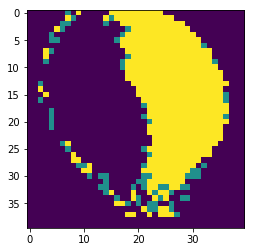

In [5]:
import matplotlib.pyplot as plt
plt.imshow(solution_policy)
plt.show()

In [6]:
np.unique(solution_policy)

array([0, 1, 2])

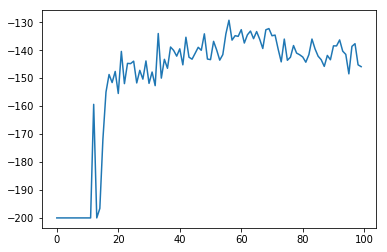

In [7]:
plt.plot(score_data)
plt.show()

In [8]:
len(matrix)

100

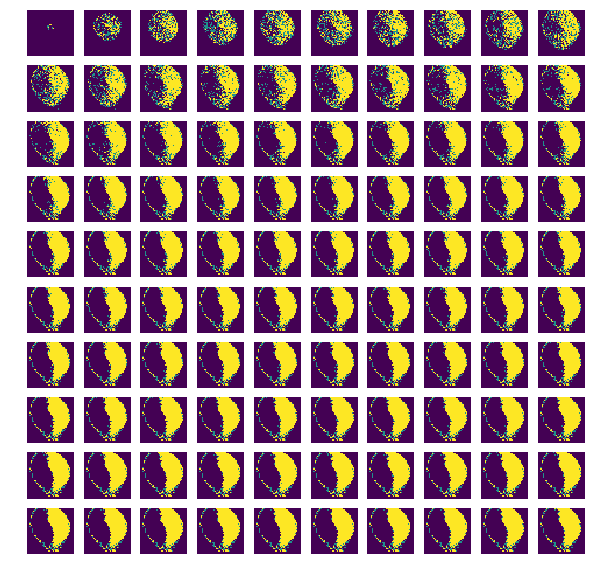

In [9]:
n = 10
m = 10
f, axarr = plt.subplots(m,n, figsize=(n, m))
for i in range(len(matrix)):
    axarr[i//n, i%n].imshow(matrix[i])
    axarr[i//n, i%n].axis('off')
plt.show()

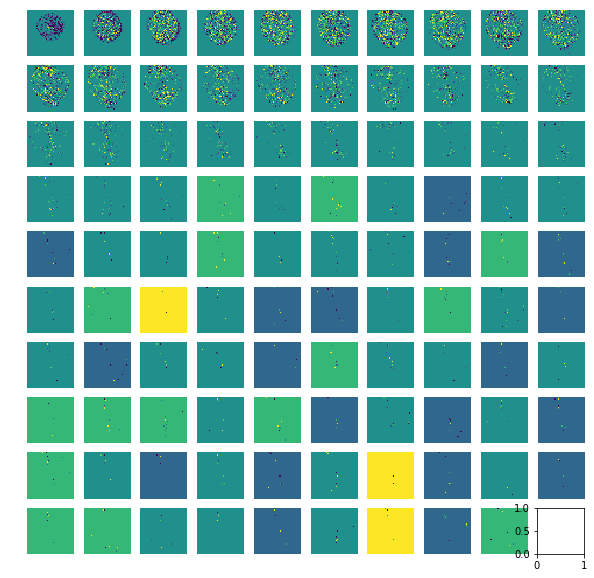

In [10]:
n = 10
m = 10
f, axarr = plt.subplots(m,n, figsize=(n, m))
for i in range(len(matrix)-1):
    axarr[i//n, i%n].imshow(matrix[i]-matrix[i+1])
    axarr[i//n, i%n].axis('off')
plt.show()